In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import plotly.express as px

In [16]:
df = pd.read_csv("retail_store_inventory.csv")
df.drop(columns=["Units Sold"], inplace=True)
df.rename(columns={"Units Sold.1" : "Units Sold"}, inplace=True)
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Ordered,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Units Sold
0,2023-11-18,S002,P0005,Clothing,South,126,169,96.32,0,Snowy,0,99.85,Winter,0
1,2023-04-18,S004,P0002,Toys,North,59,196,94.16,0,Snowy,0,92.78,Winter,0
2,2022-07-28,S001,P0006,Furniture,West,136,63,97.47,5,Snowy,0,93.39,Winter,0
3,2022-11-09,S001,P0019,Toys,East,52,200,95.52,0,Snowy,0,93.60,Winter,0
4,2023-10-01,S004,P0006,Clothing,North,198,127,93.62,5,Snowy,0,96.86,Winter,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Ordered       73100 non-null  int64  
 7   Price               73100 non-null  float64
 8   Discount            73100 non-null  int64  
 9   Weather Condition   73100 non-null  object 
 10  Holiday/Promotion   73100 non-null  int64  
 11  Competitor Pricing  73100 non-null  float64
 12  Seasonality         73100 non-null  object 
 13  Units Sold          73100 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 7.8+ MB


In [20]:
print(df.duplicated().sum())

0


In [19]:
print(df.isnull().sum())

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Ordered         0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
Units Sold            0
dtype: int64


In [5]:
df.describe()

,Inventory Level,Units Ordered,Price,Discount,Holiday/Promotion,Competitor Pricing,Units Sold
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,110.004473,55.135108,10.009508,0.497305,55.146077,136.464870
std,129.949514,52.277448,26.021945,7.083746,0.499996,26.191408,108.919406
min,50.000000,20.000000,10.000000,0.000000,0.000000,5.030000,0.000000
25%,162.000000,65.000000,32.650000,5.000000,0.000000,32.680000,49.000000
50%,273.000000,110.000000,55.050000,10.000000,0.000000,55.010000,107.000000
75%,387.000000,155.000000,77.860000,15.000000,1.000000,77.820000,203.000000
max,500.000000,200.000000,100.000000,20.000000,1.000000,104.940000,499.000000


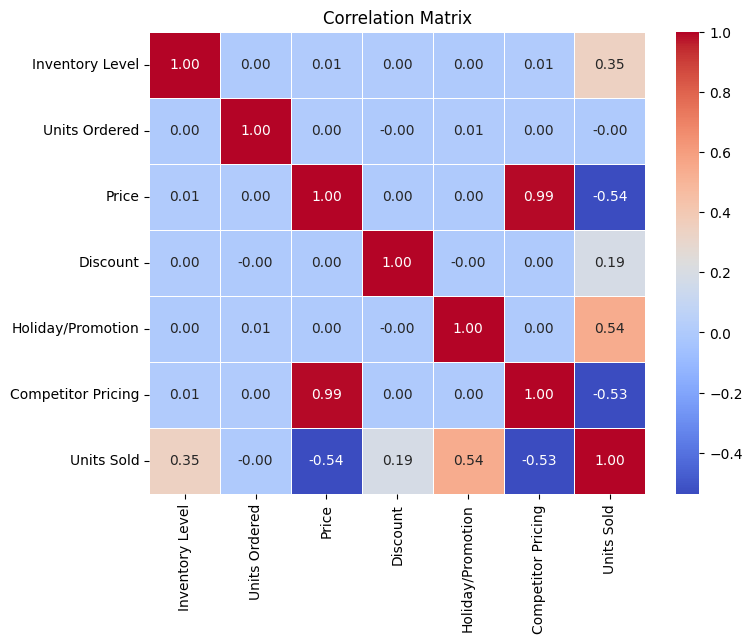

In [38]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix") 
plt.show()

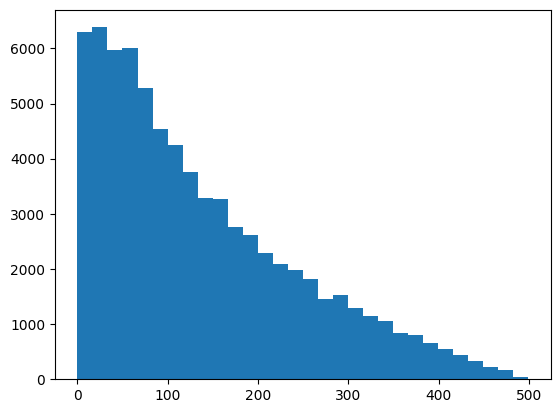

In [39]:
plt.hist(df["Units Sold"], bins=30)
plt.show()

In [45]:
features = ["Category", "Price", "Discount", "Inventory Level",
            "Weather Condition", "Holiday/Promotion", "Seasonality"]
target = "Units Sold" 
categorical_features = ["Weather Condition", "Holiday/Promotion", "Seasonality", "Category"]
numerical_features = list(set(features) - set(categorical_features))

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)  

}

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

results = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}


In [42]:
results

{'RandomForest': {'MAE': 25.550185248518016,
  'RMSE': 34.88520349915884,
  'R²': 0.8955348177598822},
 'LinearRegression': {'MAE': 33.63931258549932,
  'RMSE': 42.43295981900589,
  'R²': 0.845440502556504},
 'DecisionTree': {'MAE': 34.84794801641587,
  'RMSE': 48.140219980321675,
  'R²': 0.8010677541060744},
 'SVR': {'MAE': 24.315417313089323,
  'RMSE': 33.31834871621056,
  'R²': 0.9047081006528919},
 'XGBoost': {'MAE': 23.89878907473414,
  'RMSE': 32.5653921741629,
  'R²': 0.9089664099851312}}

In [ ]:
# joblib.dump(model, "modele.pkl")

In [319]:
model = joblib.load('modele.pkl')


input_data = {
    "Category": ["Clothing"],
    "Price": [50],
    "Discount": [10],
    "Inventory Level": [1],
    "Weather Condition": ["Snowy"],
    "Holiday/Promotion": [1],
    "Seasonality": ["Summer"]
}

input_df = pd.DataFrame(input_data)

prediction = model.predict(input_df)
prediction

array([120.58])

In [324]:
cat_encoder = preprocessor.named_transformers_['cat']
cat_features = cat_encoder.get_feature_names_out(categorical_features)

feature_names = np.concatenate([numerical_features, cat_features])
importances = model.named_steps['regressor'].feature_importances_

feat_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_importances.head(10))

                     Feature  Importance
2                      Price    0.349686
8        Holiday/Promotion_1    0.174414
1            Inventory Level    0.167355
7        Holiday/Promotion_0    0.121176
0                   Discount    0.045200
12        Seasonality_Winter    0.040819
6    Weather Condition_Sunny    0.032067
5    Weather Condition_Snowy    0.016695
11        Seasonality_Summer    0.014817
3   Weather Condition_Cloudy    0.010694
